# KNN Model for the Research Paper
<hr>

This model is used in the research paper "Comparative Analysis of Machine Learning Algorithms for a Stroke Detection System" for the COMP6696001 - Research Methodology in Computer Science in Binus University @ Alam Sutera Campus.<br><br>
The first draft of the paper can be found in [this link](https://www.overleaf.com/read/pyyrwnkbdzxm#7b6ac8) 

## Preparations
<hr>

For the preparation section, we need to import the necessary libraries that will be used somewhere in the program.

In [4]:
import pandas as pand
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sea
from sklearn.preprocessing import OneHotEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsRegressor

We then need to import the csv file from our Repository to be used by our model.

In [5]:
data = pand.read_csv('../Dataset/healthcare-dataset-stroke-data.csv')

## Data Engineering
<hr>

An example of 10 rows from the dataset

In [6]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


This block prints out the number of rows and columns of the dataset as well as it's features/columns.

In [21]:
print("(Rows, Columns) of Dataset:", data.shape)
column = pand.DataFrame(data)
print()
print("Features of the Dataset: ", column.columns.tolist())

(Rows, Columns) of Dataset: (5110, 12)

Features of the Dataset:  ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


Brief descriptions of the data.

In [8]:
print("Data Descriptions:")
print(data.iloc[:, 0:5].describe())
print()
print(data.iloc[:, 5:12].describe())

Data Descriptions:
                 id          age  hypertension  heart_disease
count   5110.000000  5110.000000   5110.000000    5110.000000
mean   36517.829354    43.226614      0.097456       0.054012
std    21161.721625    22.612647      0.296607       0.226063
min       67.000000     0.080000      0.000000       0.000000
25%    17741.250000    25.000000      0.000000       0.000000
50%    36932.000000    45.000000      0.000000       0.000000
75%    54682.000000    61.000000      0.000000       0.000000
max    72940.000000    82.000000      1.000000       1.000000

       avg_glucose_level          bmi       stroke
count        5110.000000  4909.000000  5110.000000
mean          106.147677    28.893237     0.048728
std            45.283560     7.854067     0.215320
min            55.120000    10.300000     0.000000
25%            77.245000    23.500000     0.000000
50%            91.885000    28.100000     0.000000
75%           114.090000    33.100000     0.000000
max           

## Data Pre-Processing
<hr>

Checking for null Values

In [9]:
checkNULL = data.isnull().sum()
print(checkNULL)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


Checking for Duplicate Rows

In [10]:
duplicateCheck = data.duplicated().sum()
print(duplicateCheck)

0


Simple Encoding to Convert Categorical Data to Numerical Data

In [11]:
data.replace(to_replace="Urban", value=1, inplace=True)
data.replace(to_replace="Rural", value=0, inplace=True)
data.replace(to_replace="Yes", value=1, inplace=True)
data.replace(to_replace="No", value=0, inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_14428\2423810862.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(to_replace="Rural", value=0, inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_14428\2423810862.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(to_replace="No", value=0, inplace=True)


Simple Imputation to Fix null Values

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputedData = pand.DataFrame(imputer.fit_transform(data), columns=data.columns, index=data.id)
imputedData = imputedData.reset_index(drop=True)

Checking for null Values after Imputation

In [13]:
imputedData.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Simple One-Hot Encoding, Dropping of 'id' column, and the final product.

In [14]:
imputedData = pand.get_dummies(imputedData, columns=['work_type', 'smoking_status', 'gender'])
imputedData.drop(columns=['id'], inplace=True)
imputedData.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other
0,67.0,0,1,1,1,228.69,36.6,1,False,False,True,False,False,False,True,False,False,False,True,False
1,61.0,0,0,1,0,202.21,28.7,1,False,False,False,True,False,False,False,True,False,True,False,False
2,80.0,0,1,1,0,105.92,32.5,1,False,False,True,False,False,False,False,True,False,False,True,False
3,49.0,0,0,1,1,171.23,34.4,1,False,False,True,False,False,False,False,False,True,True,False,False
4,79.0,1,0,1,0,174.12,24.0,1,False,False,False,True,False,False,False,True,False,True,False,False


## Model Building
<hr>

Splitting the Data into x and y values

In [15]:
yData = imputedData.pop('stroke').to_numpy()
xData = imputedData.to_numpy()
xData = xData.astype(np.float32)
yData = yData.astype(np.float32)
xData.shape, yData.shape

((5110, 19), (5110,))

In [16]:
Split = int(0.70*len(xData))
xTrain = xData[:Split]
yTrain = yData[:Split]
xTest = xData[Split:]
yTest = yData[Split:]

Fitting the values to the KNN model

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knnClassifier = KNeighborsClassifier()
knnClassifier.fit(xTrain, yTrain)
knnClassifier.score(xTrain, yTrain)

0.9326251048364551

Printing the Classification Report

In [18]:
from sklearn.metrics import classification_report

y_pred = knnClassifier.predict(xTrain)
classification_report = classification_report(yTrain, y_pred)

print(classification_report)

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      3328
         1.0       0.55      0.17      0.26       249

    accuracy                           0.93      3577
   macro avg       0.75      0.58      0.61      3577
weighted avg       0.91      0.93      0.92      3577



Printing the confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix
confusionMatrixKNN = confusion_matrix(yTrain, y_pred)
print(confusionMatrixKNN)

[[3294   34]
 [ 207   42]]


Outputting the heatmap

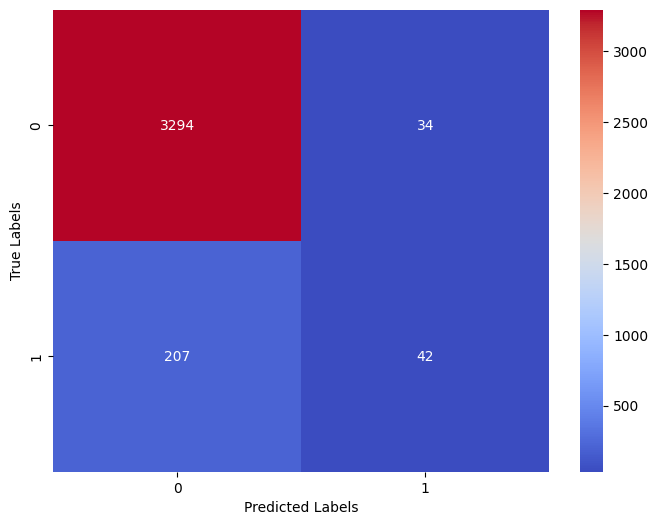

In [20]:
plot.figure(figsize=(8,6))
sea.heatmap(confusionMatrixKNN, annot=True, fmt="d", cmap="coolwarm")
plot.xlabel("Predicted Labels")
plot.ylabel("True Labels")
plot.show()

<hr>